In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import probplot

In [2]:
folder = 'D:\Tinu Project\Projects Files Excel'
file = 'Electric Motor.csv'
folder_file = os.path.join(folder,file)
df = pd.read_csv(folder_file)


In [53]:
df.head

profile_summary = df.groupby('profile_id').agg(['mean','median','std'])
print("Summary Statistics:",profile_summary)

Summary Statistics:                   u_q                          coolant                        \
                 mean     median        std       mean     median        std   
profile_id                                                                     
2            5.894508   4.175154   2.231838  18.542054  18.526077   0.328558   
3            5.918387   4.256491   1.743486  18.761891  18.692716   0.318732   
4           76.794853  83.666458  32.898430  18.626801  18.585956   0.385639   
5           47.176984  49.522438   3.140075  18.801043  18.754805   0.367355   
6           63.622428  86.060833  35.901259  29.022098  18.836512  17.476679   
...               ...        ...        ...        ...        ...        ...   
76          44.941804  31.487887  48.679996  54.300834  58.679291  20.055706   
78          47.911893  43.933583  44.546293  51.329973  49.993491  17.949381   
79          50.683489  47.710526  46.336926  54.419152  52.782760  24.288857   
80          51.02316

In [55]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [7]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [9]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [10]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1330811    False
1330812    False
1330813    False
1330814    False
1330815    False
Length: 1330816, dtype: bool

In [12]:
df.duplicated().sum()

0

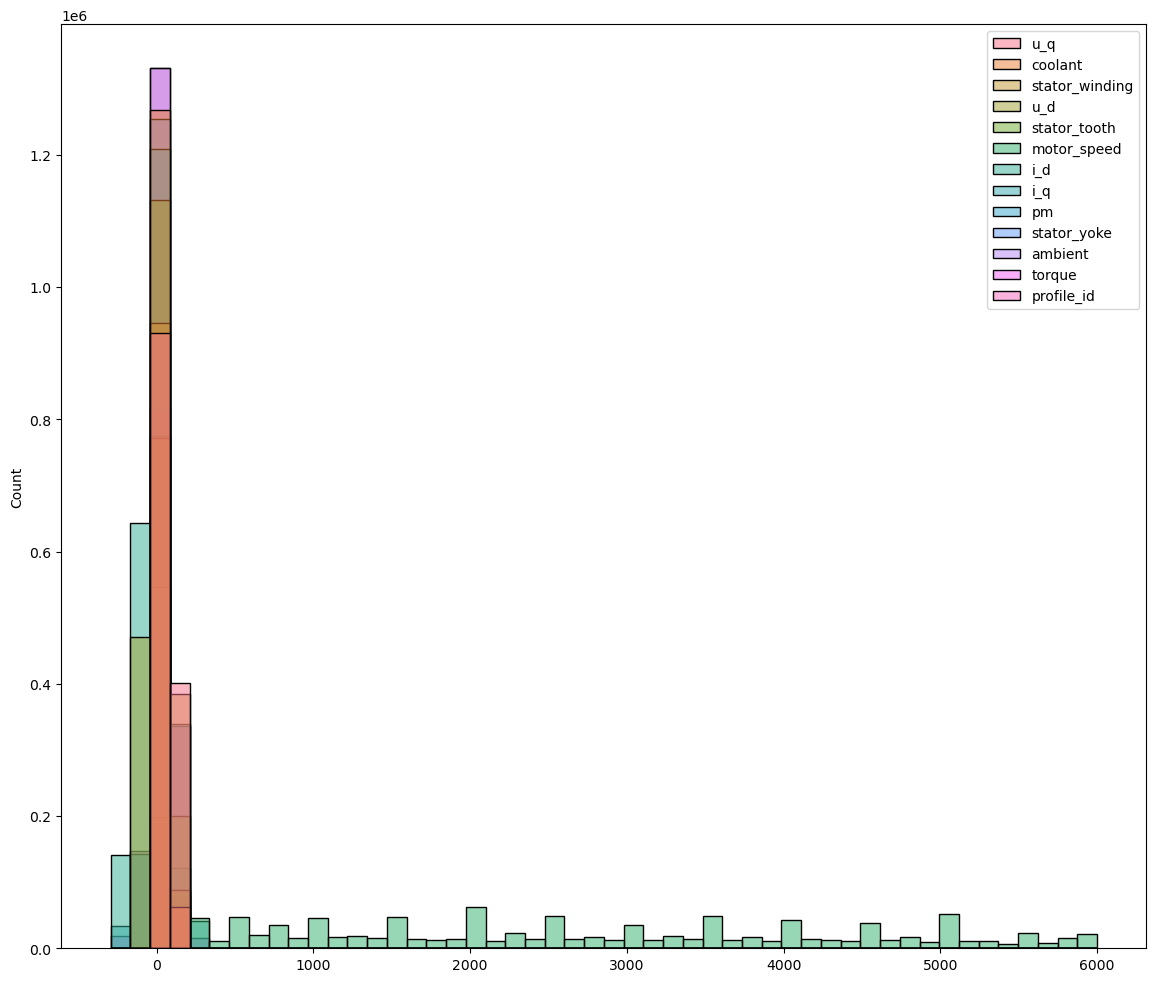

In [14]:
plt.figure(figsize=(14,12))
sns.histplot(data = df ,bins =50)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


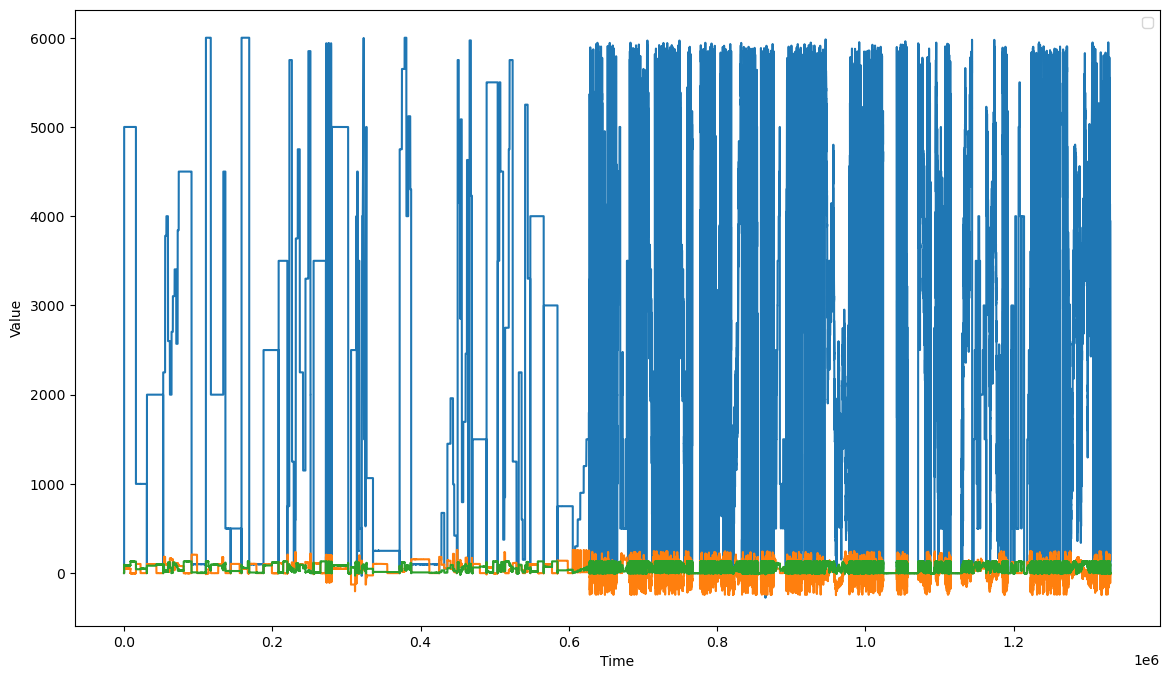

In [17]:
plt.figure(figsize=(14,8))
plt.plot(df['motor_speed'])
plt.plot(df['torque'])
plt.plot(df['u_q'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

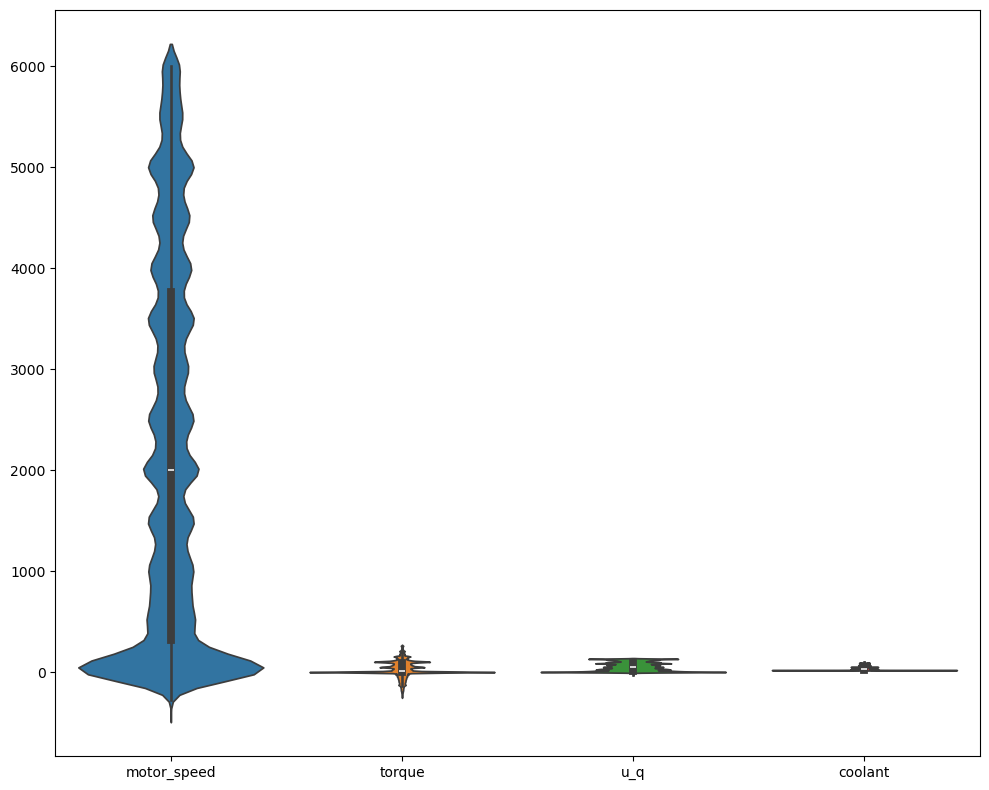

In [18]:
plt.figure(figsize=(10,8))
sns.violinplot(df[['motor_speed','torque','u_q','coolant']])
plt.tight_layout()
plt.show()

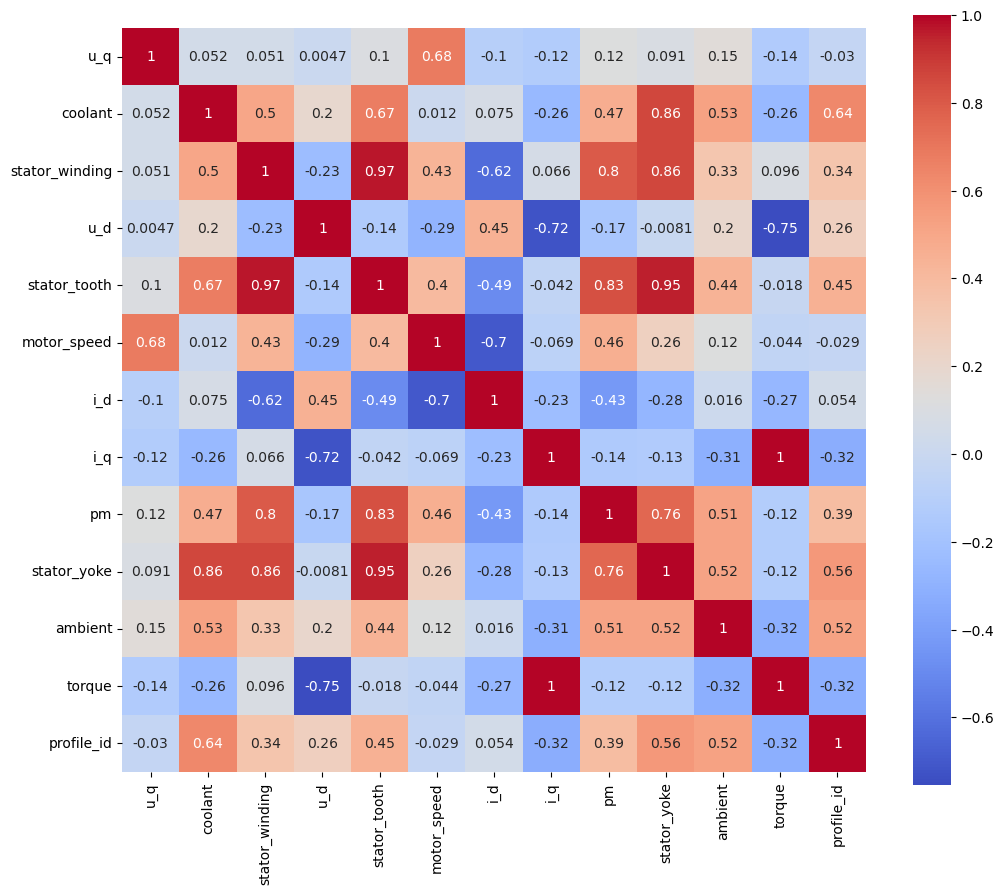

In [20]:
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


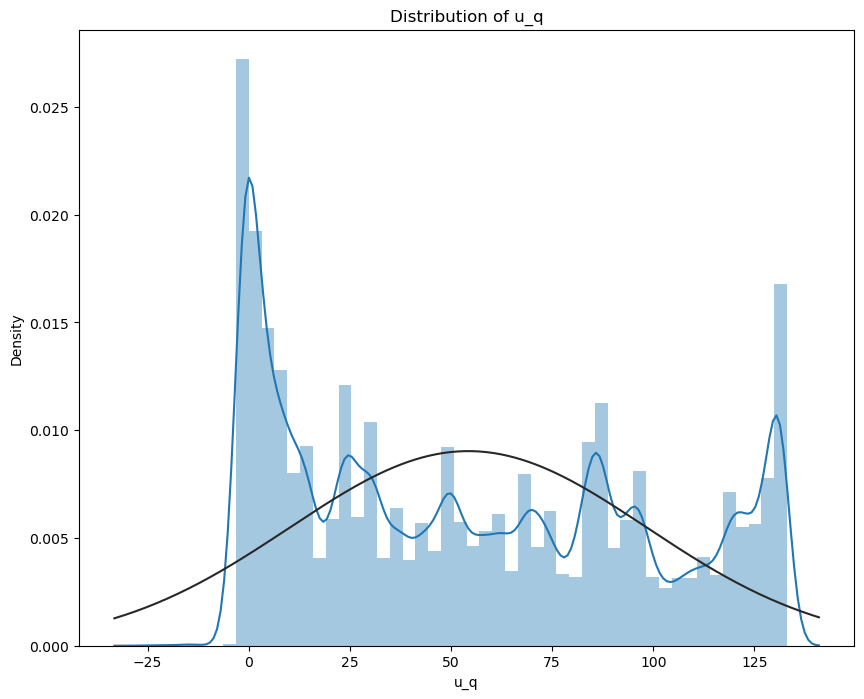

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


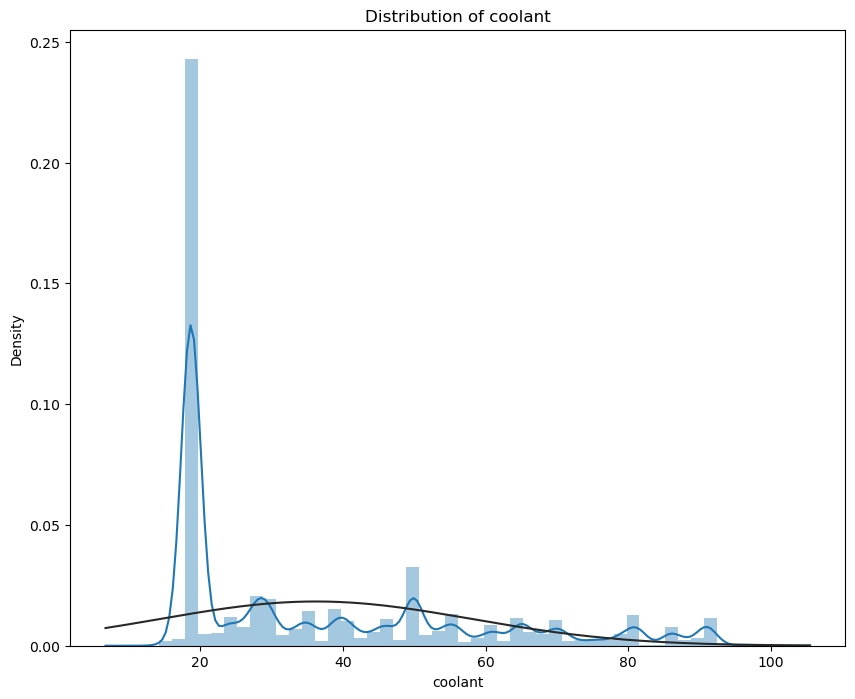

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


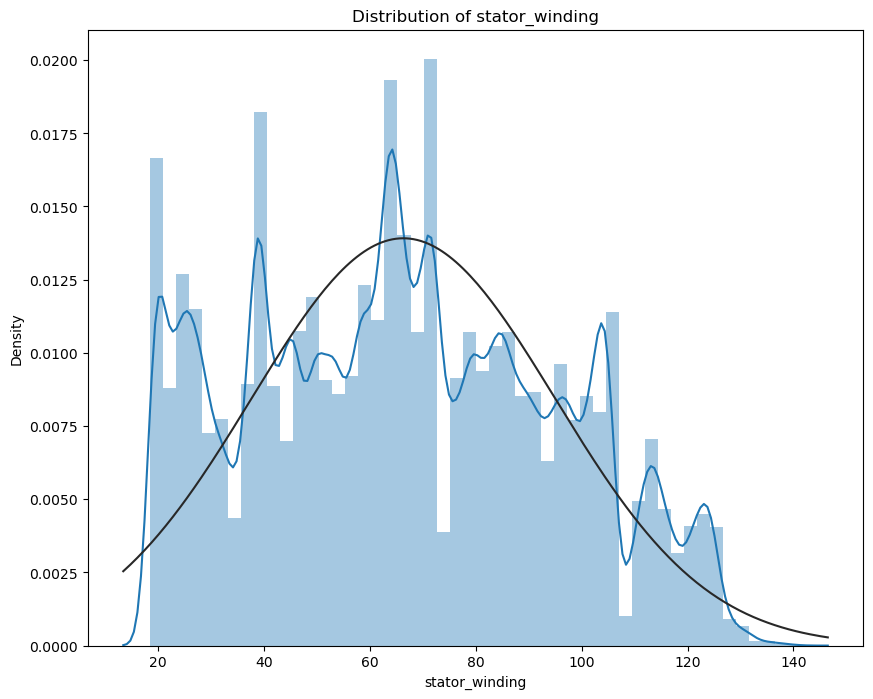

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


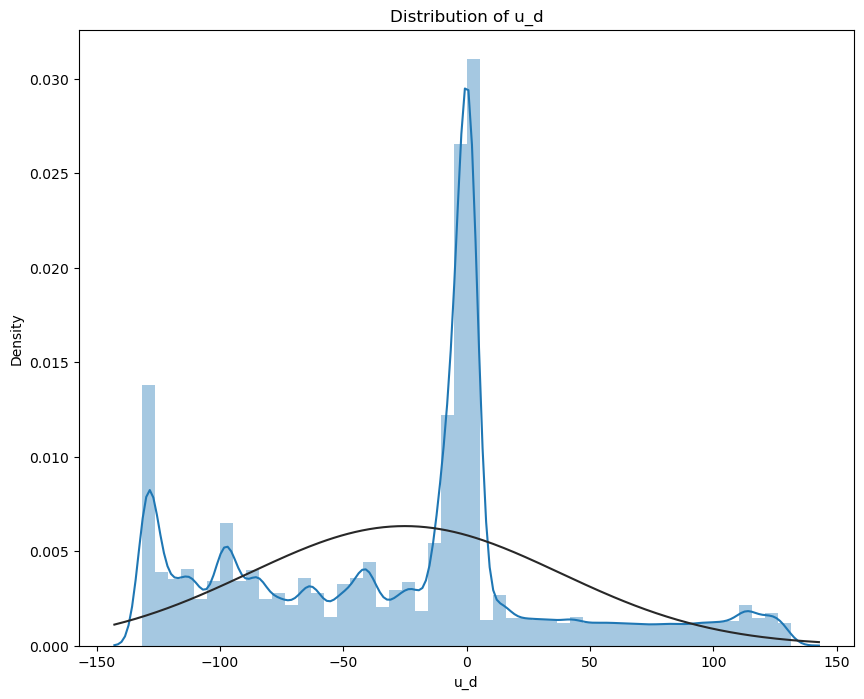

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


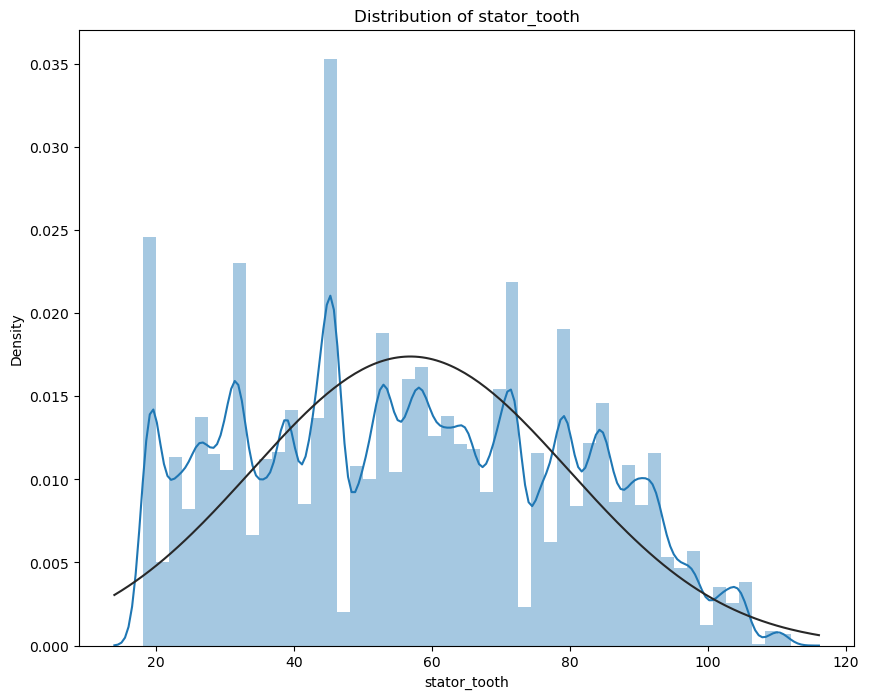

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


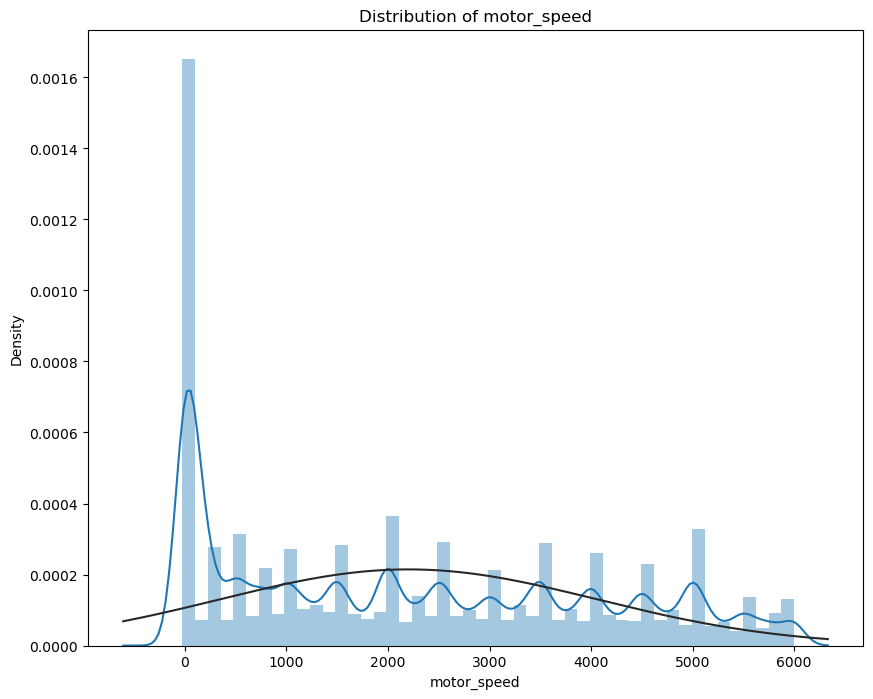

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


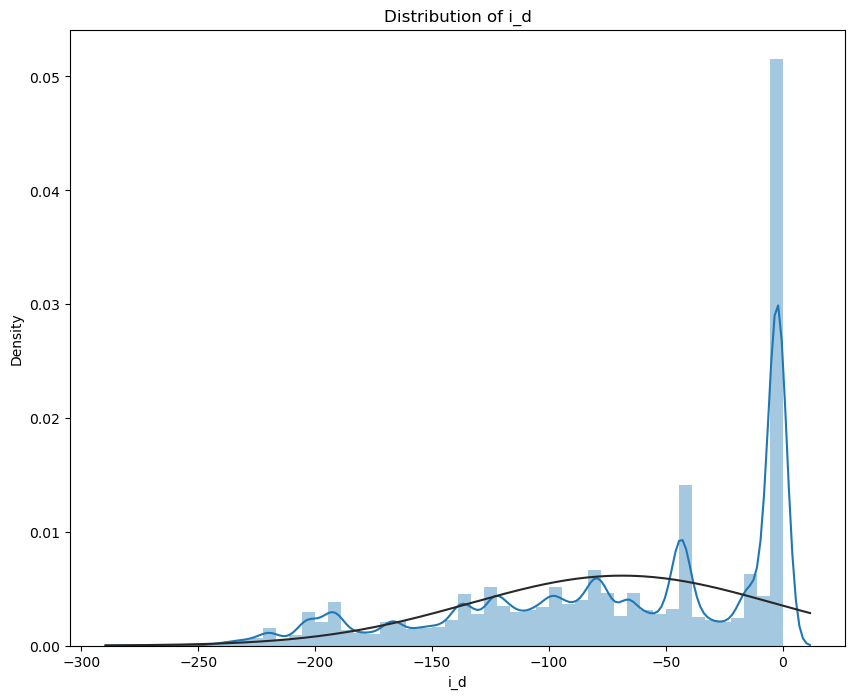

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


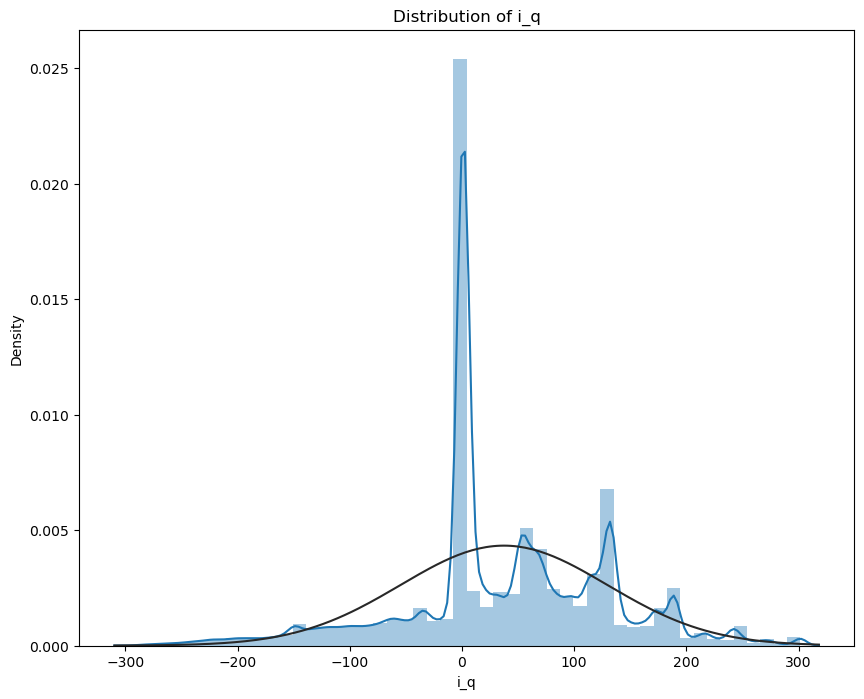

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


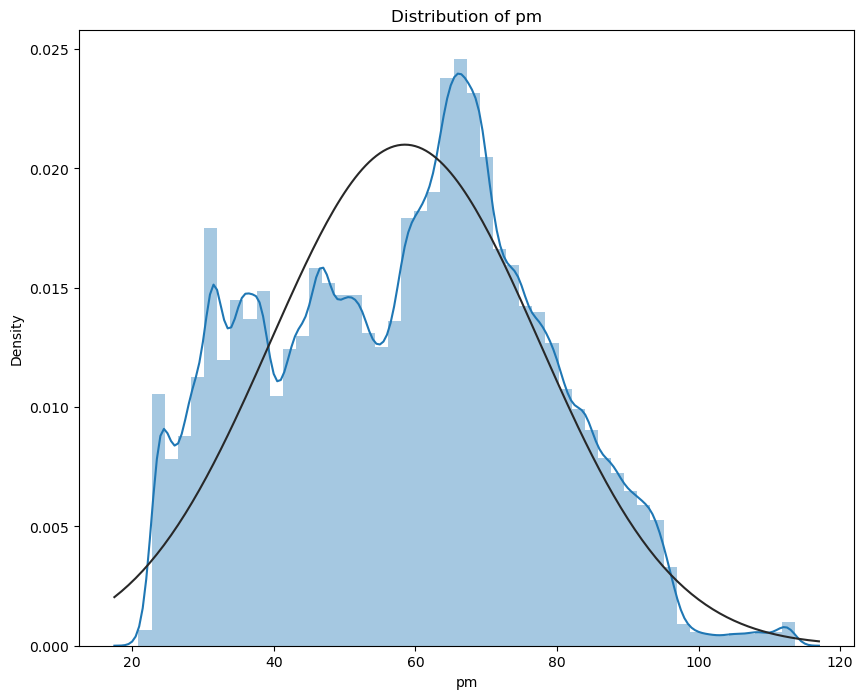

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


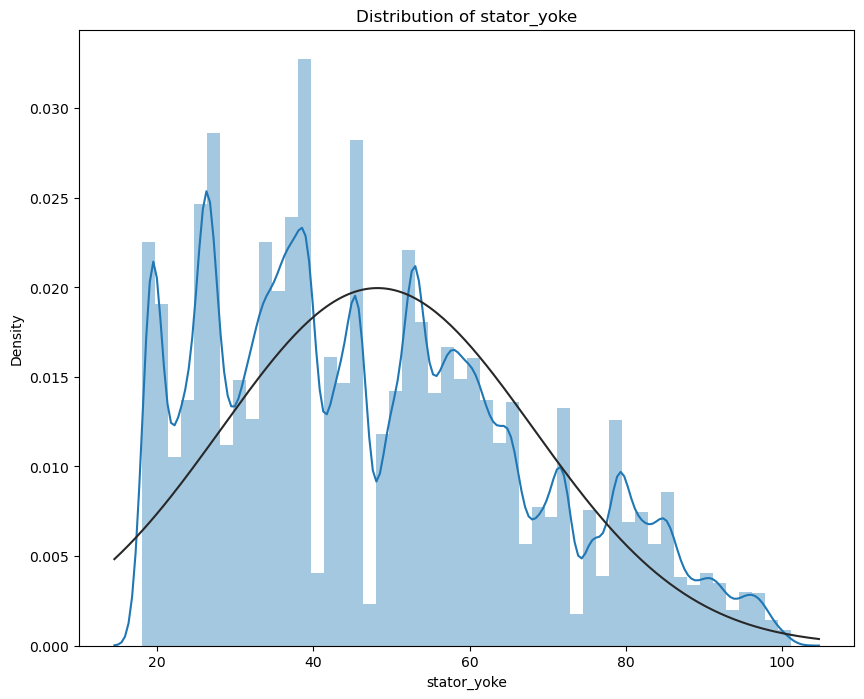

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


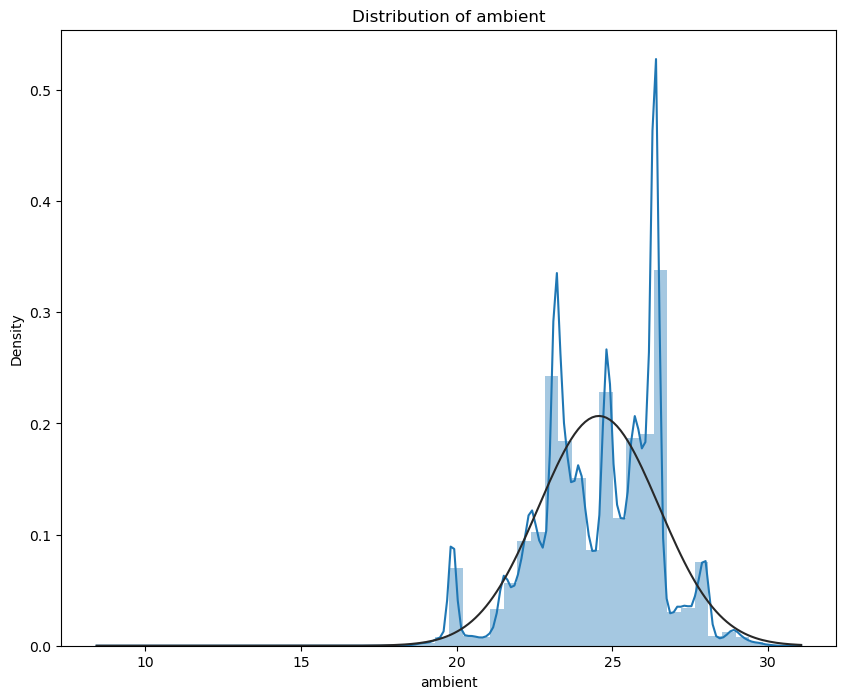

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


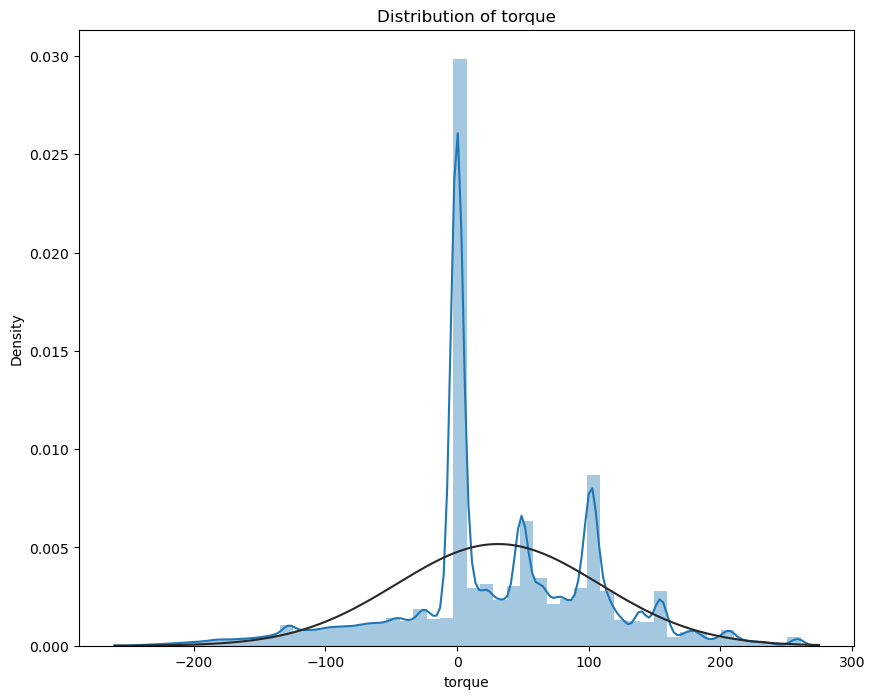

C:\Users\mohit\AppData\Local\Temp\ipykernel_18280\3037286922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],fit=norm)


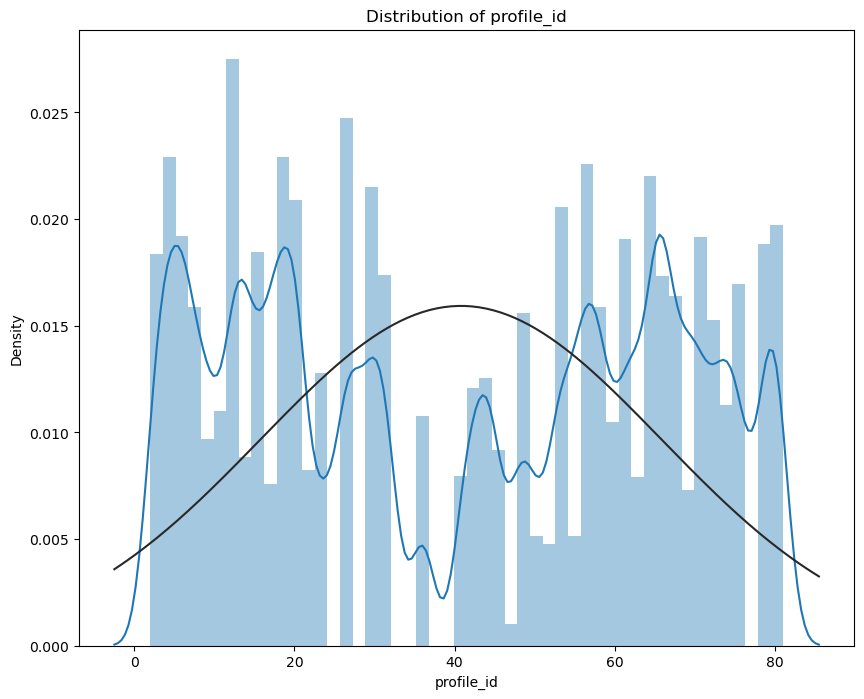

In [22]:
for col in df.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col],fit=norm)
    plt.title(f"Distribution of {col}")
    plt.show()

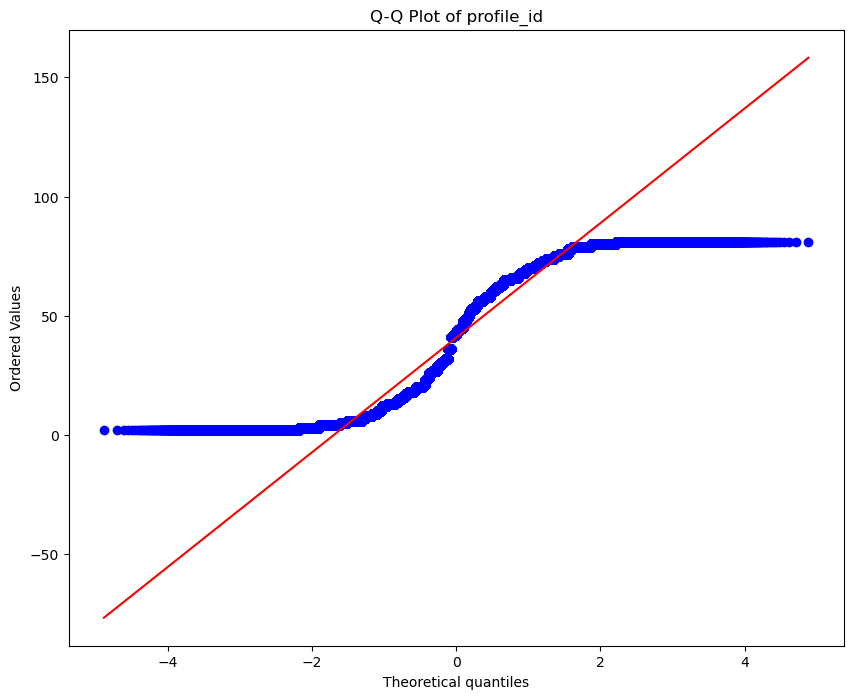

In [23]:
plt.figure(figsize=(10,8))
stats.probplot(df[col],plot=plt)
plt.title(f"Q-Q Plot of {col}")
plt.show()

<Figure size 1000x600 with 0 Axes>

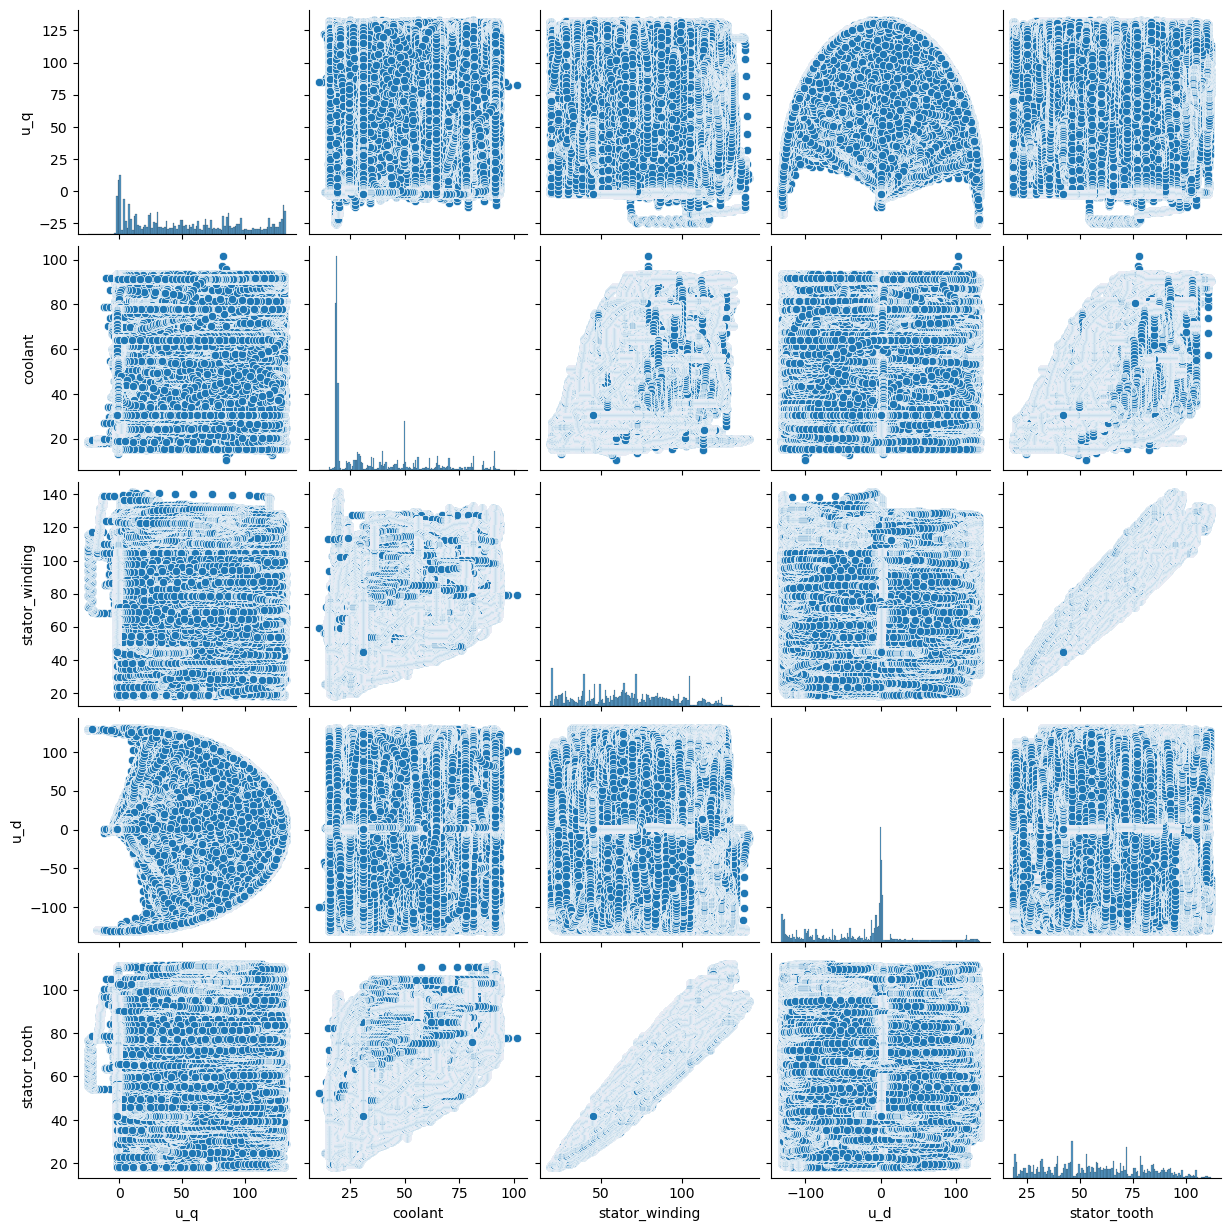

In [25]:
plt.figure(figsize=(10,6))
sns.pairplot(df,vars=['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth'])
plt.show()

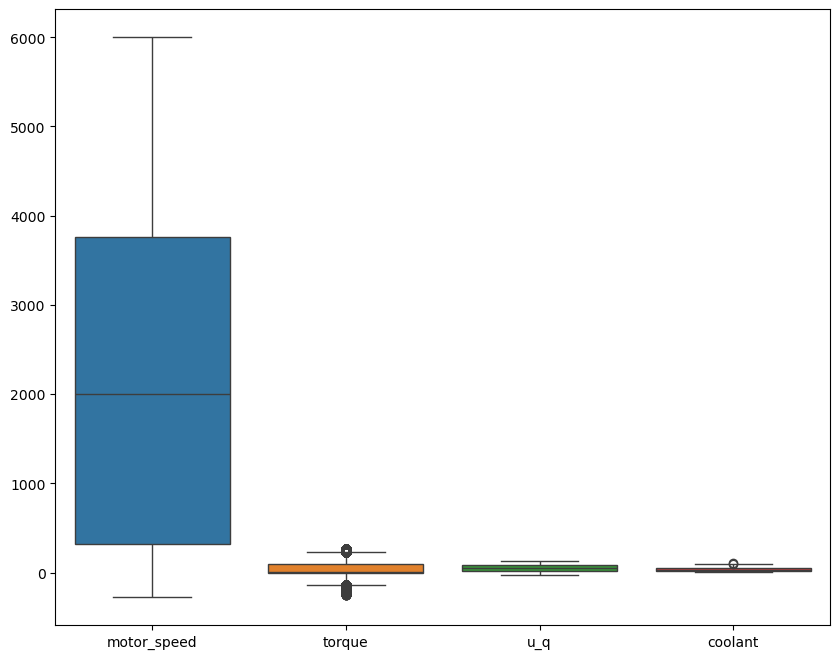

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[['motor_speed', 'torque', 'u_q', 'coolant']])
plt.show()

C:\Users\mohit\anaconda3\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


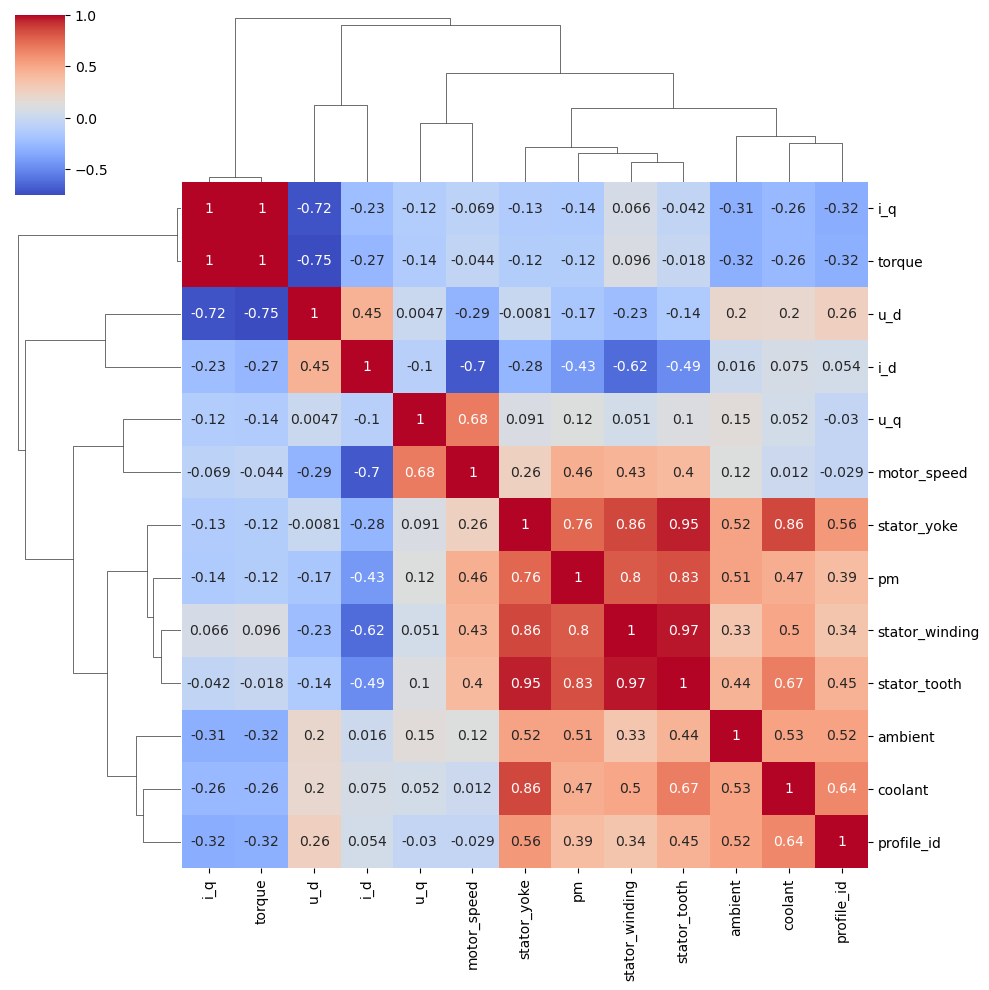

In [36]:
import scipy.cluster.hierarchy as sch
correlation_matrix = df.corr()
sns.clustermap(correlation_matrix, annot =True, cmap='coolwarm',square=True)
plt.show()


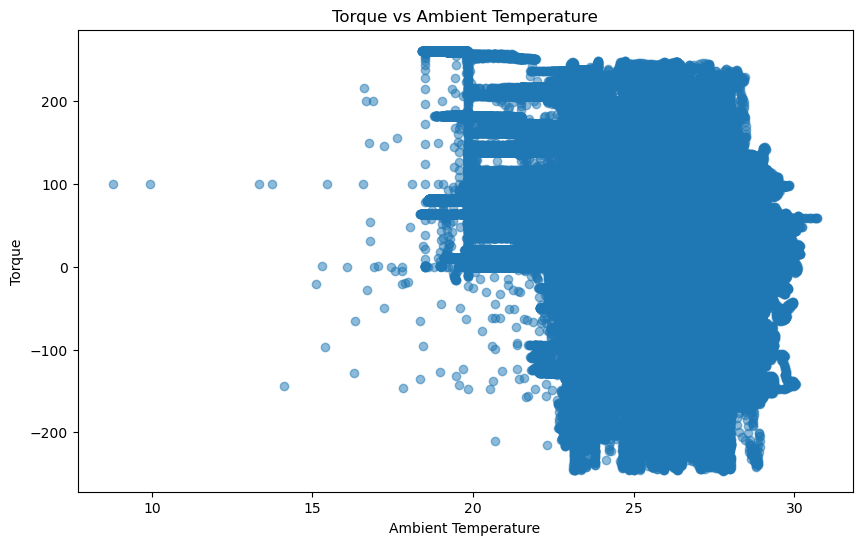

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(df['ambient'],df['torque'],alpha=0.5)
plt.title('Torque vs Ambient Temperature')
plt.xlabel('Ambient Temperature')
plt.ylabel('Torque')
plt.show()

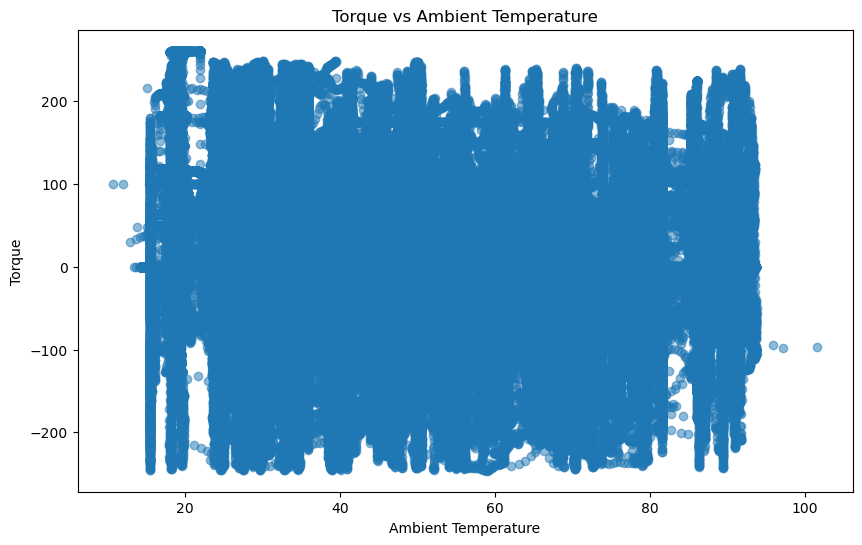

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(df['coolant'],df['torque'],alpha=0.5)
plt.title('Torque vs Ambient Temperature')
plt.xlabel('Ambient Temperature')
plt.ylabel('Torque')
plt.show()

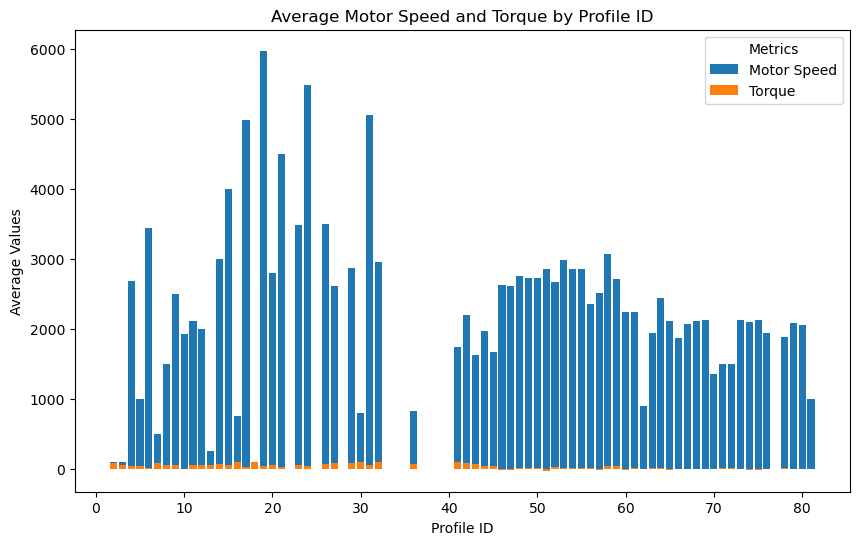

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(prof_ana.index, prof_ana['motor_speed'], label='Motor Speed')
plt.bar(prof_ana.index, prof_ana['torque'], label='Torque')
plt.title('Average Motor Speed and Torque by Profile ID')
plt.xlabel('Profile ID')
plt.ylabel('Average Values')
plt.legend(title='Metrics')
plt.show()

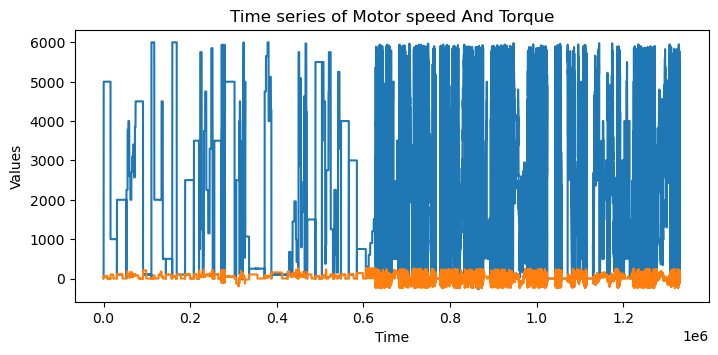

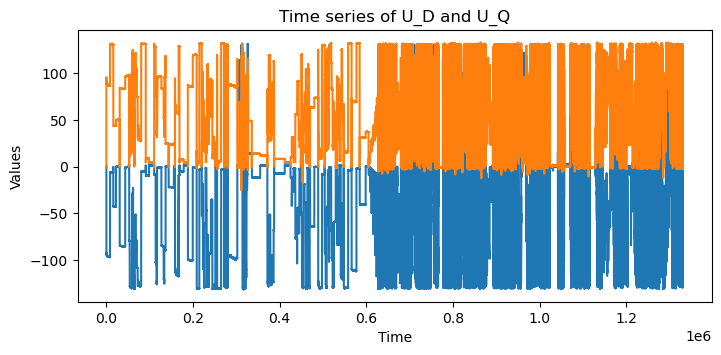

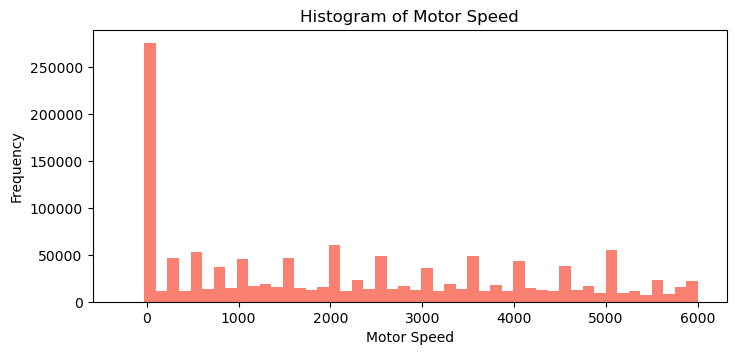

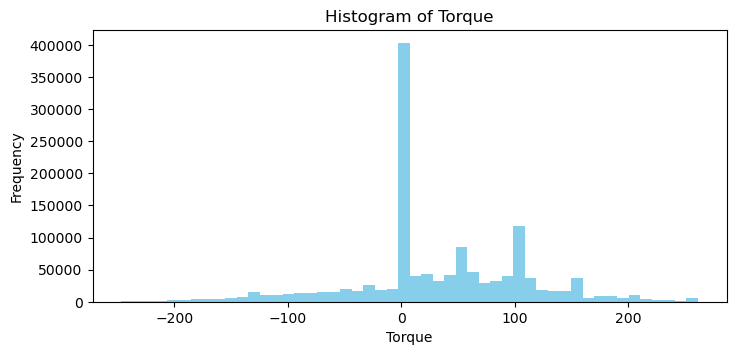

Text(0.5, 1.0, 'Violin Plot of u_q and u_d')

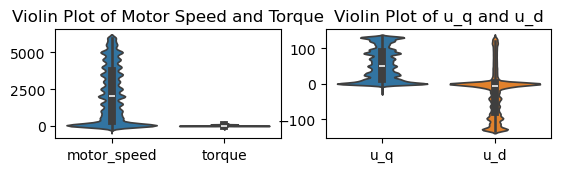

In [52]:
plt.figure(figsize=(18,12))

plt.subplot(3,2,1)
plt.plot(df['motor_speed'],label='Motor Speed')
plt.plot(df['torque'],label='Torque')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time series of Motor speed And Torque')
plt.show()

plt.figure(figsize=(18,12))
plt.subplot(3,2,2)
plt.plot(df['u_d'],label='U_D')
plt.plot(df['u_q'],label='U_Q')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time series of U_D and U_Q')
plt.show()

plt.figure(figsize=(18,12))
plt.subplot(3,2,3)
plt.hist(df['motor_speed'], bins =50, color="salmon")
plt.xlabel('Motor Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Motor Speed')
plt.show()

plt.figure(figsize=(18,12))
plt.subplot(3,2,4)
plt.hist(df['torque'], bins =50, color="skyblue")
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.title('Histogram of Torque')
plt.show()

plt.subplot(3, 2, 5)
sns.violinplot(data=df[['motor_speed', 'torque']])
plt.title('Violin Plot of Motor Speed and Torque')

plt.subplot(3, 2, 6)
sns.violinplot(data=df[['u_q', 'u_d']])
plt.title('Violin Plot of u_q and u_d')

Correlation between Stator Winding and Stator Tooth: 0.97


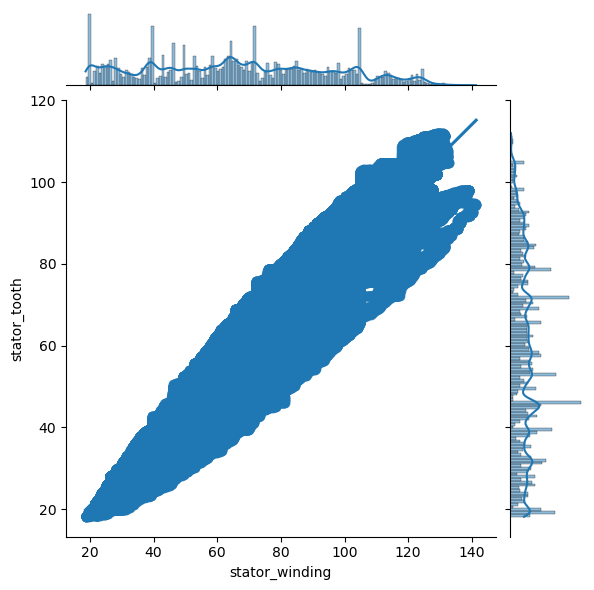

In [62]:
stator_corr = df['stator_winding'].corr(df['stator_tooth'])
print(f"Correlation between Stator Winding and Stator Tooth: {stator_corr:.2f}")

sns.jointplot(x='stator_winding',y='stator_tooth',data =df,kind='reg')
plt.show()

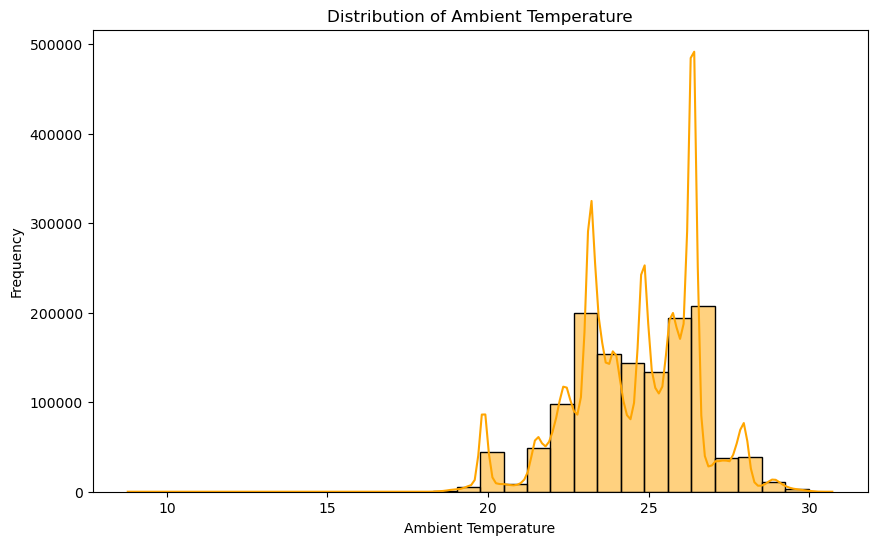

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ambient'], kde=True, bins=30, color='orange')
plt.title('Distribution of Ambient Temperature')
plt.xlabel('Ambient Temperature')
plt.ylabel('Frequency')
plt.show()